#COMPANY

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data.csv to Company_Data.csv


In [3]:
data=pd.read_csv('Company_Data.csv')
data

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
data.corr()

<ipython-input-6-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


Sales  CompPrice    Income  Advertising  Population     Price  \
Sales        1.000000   0.064079  0.151951     0.269507    0.050471 -0.444951   
CompPrice    0.064079   1.000000 -0.080653    -0.024199   -0.094707  0.584848   
Income       0.151951  -0.080653  1.000000     0.058995   -0.007877 -0.056698   
Advertising  0.269507  -0.024199  0.058995     1.000000    0.265652  0.044537   
Population   0.050471  -0.094707 -0.007877     0.265652    1.000000 -0.012144   
Price       -0.444951   0.584848 -0.056698     0.044537   -0.012144  1.000000   
Age         -0.231815  -0.100239 -0.004670    -0.004557   -0.042663 -0.102177   
Education   -0.051955   0.025197 -0.056855    -0.033594   -0.106378  0.011747   

                  Age  Education  
Sales       -0.231815  -0.051955  
CompPrice   -0.100239   0.025197  
Income      -0.004670  -0.056855  
Advertising -0.004557  -0.033594  
Population  -0.042663  -0.106378  
Price       -0.102177   0.011747  
Age          1.000000   0.006488  
Education    0.006488   1.000000

In [7]:
data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [8]:
data.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [9]:
df=pd.get_dummies(data,columns=['Urban','US'],drop_first=True)
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education  Urban_Yes  US_Yes  
0           17          1       1  
1           10          1       1  
2           12          1       1  
3           14          1       1  
4           13          1       0  
..         ...        ...     ...  
395         14          1       1  
396         11          0       1  
397         18          1       1  
398         12          1       1  
399         16          1       1  

[400 rows x 11 columns]

In [10]:
df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})
df.head()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          3   42   
1  11.22        111      48           16         260     83          1   65   
2  10.06        113      35           10         269     80          2   59   
3   7.40        117     100            4         466     97          2   55   
4   4.15        141      64            3         340    128          3   38   

   Education  Urban_Yes  US_Yes  
0         17          1       1  
1         10          1       1  
2         12          1       1  
3         14          1       1  
4         13          1       0

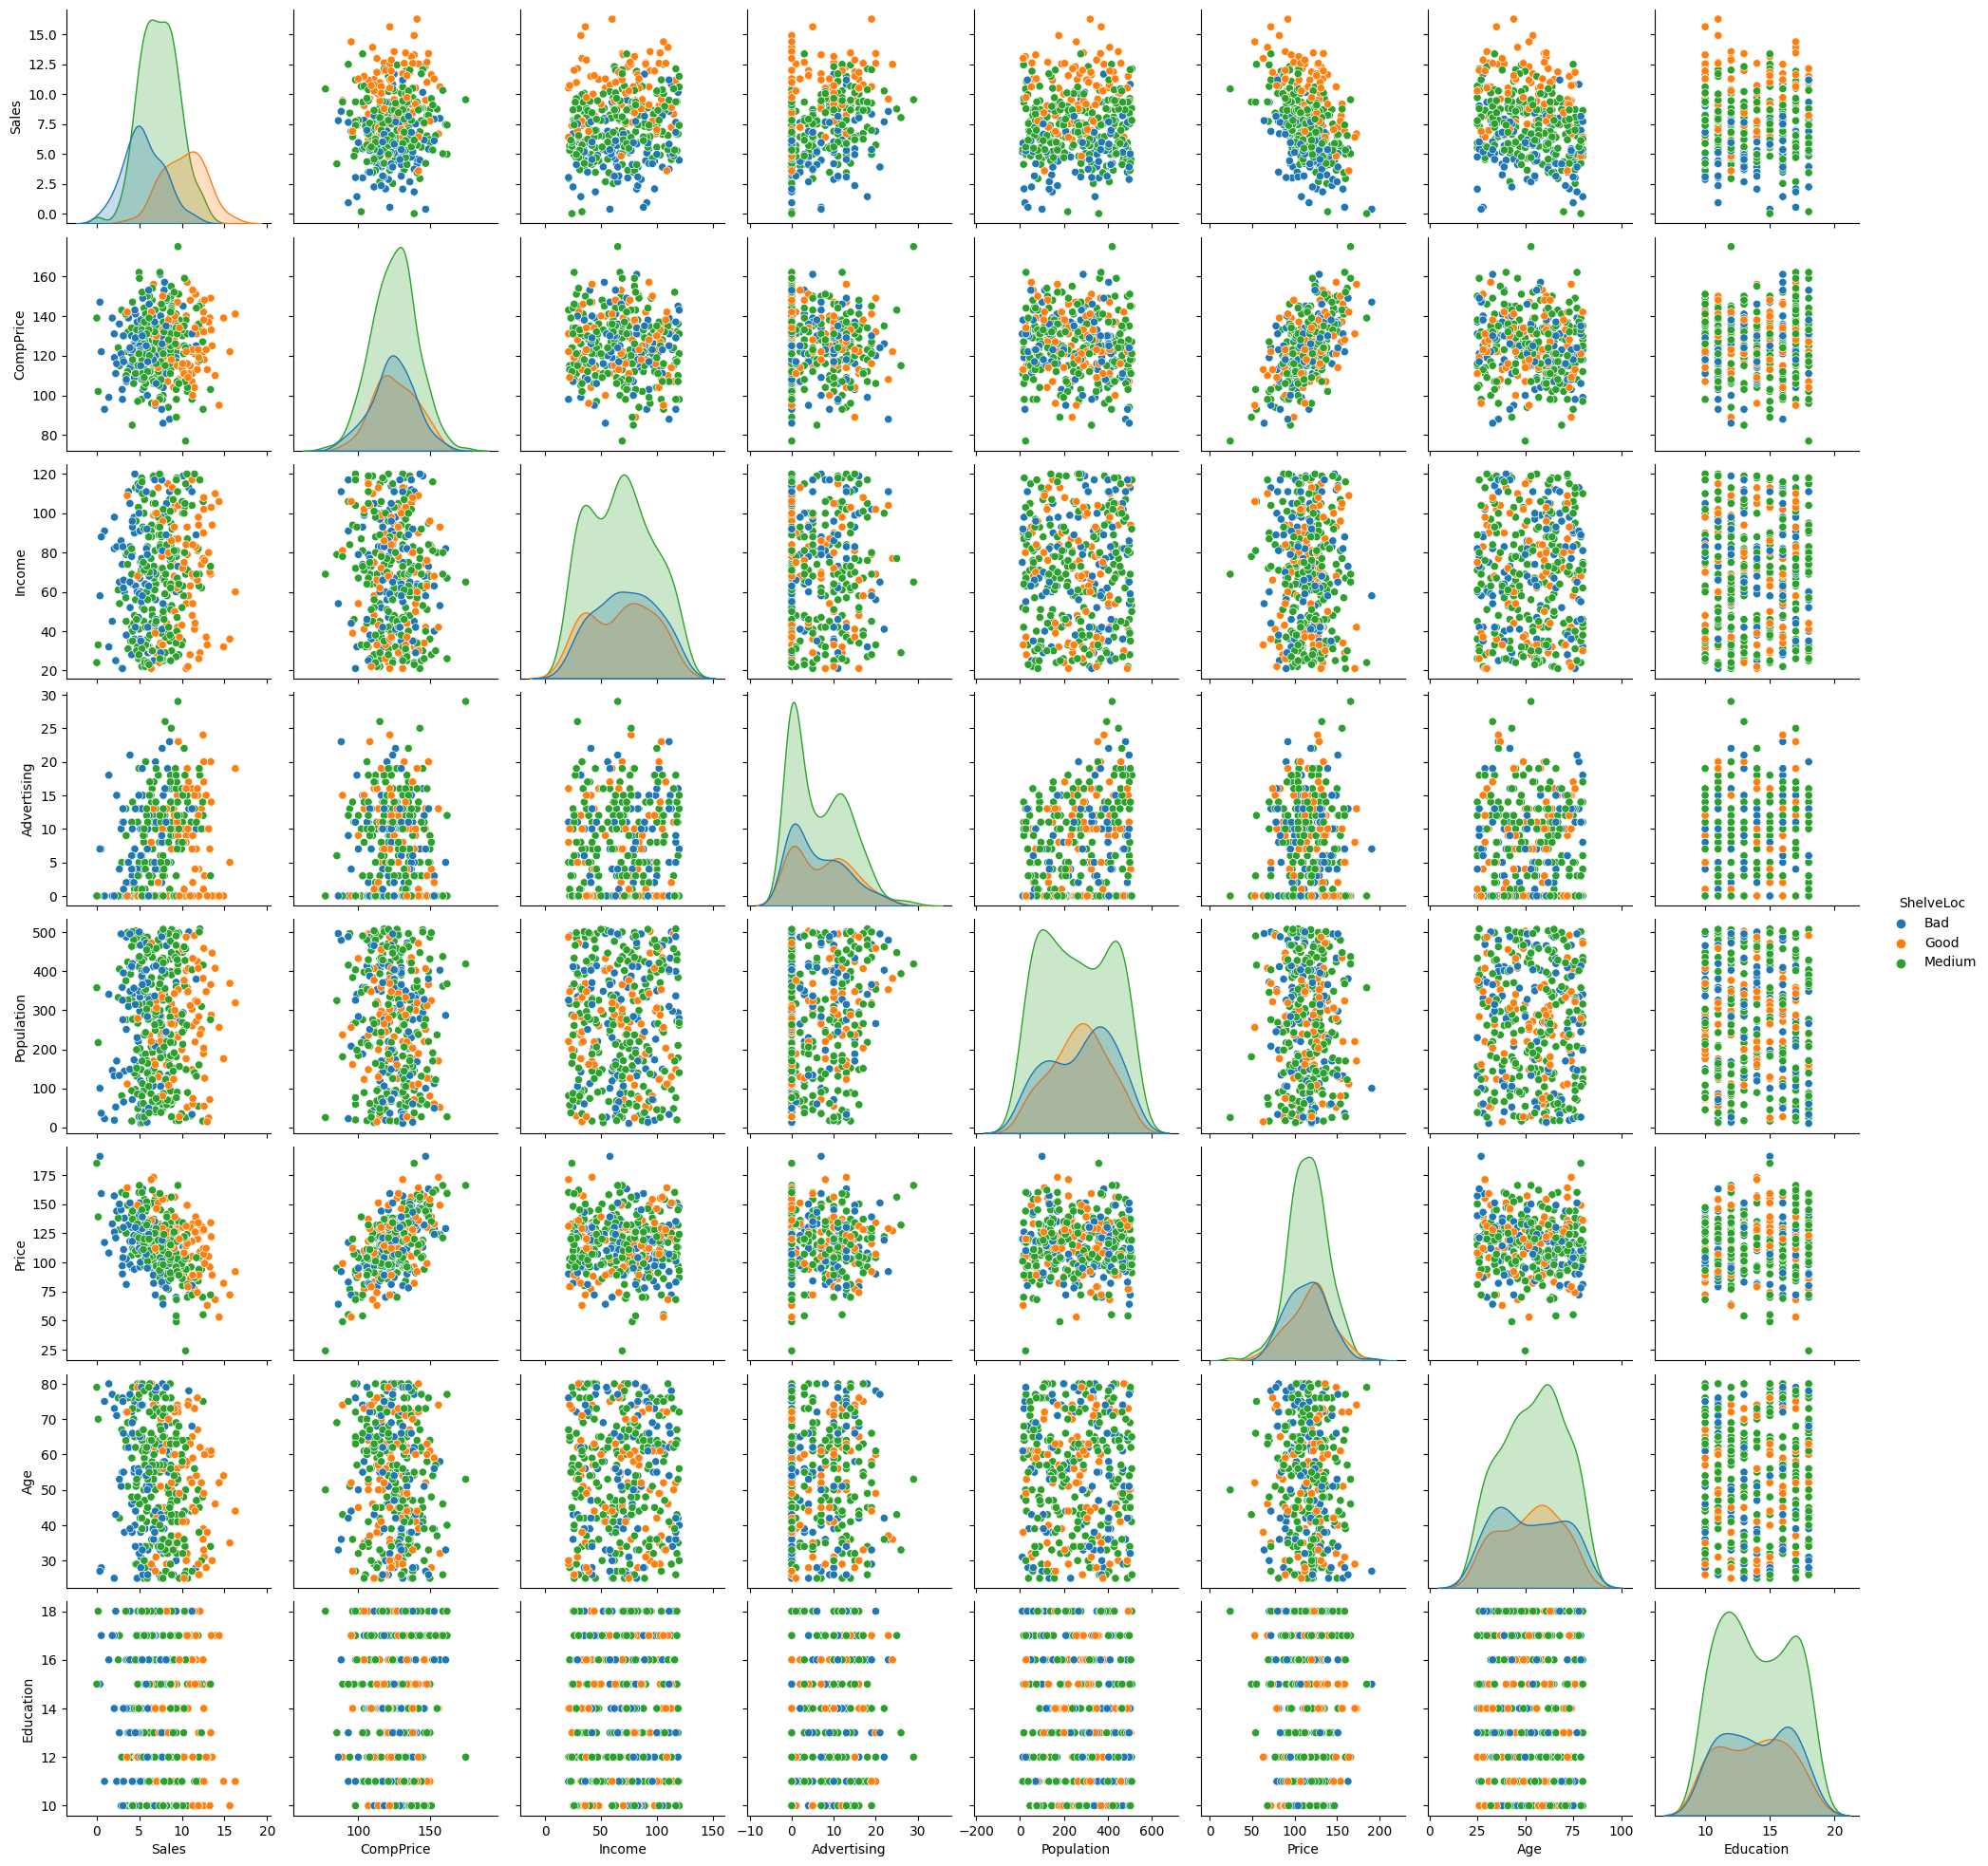

In [11]:
sns.pairplot(data=data, hue ='ShelveLoc' )

In [12]:
x=df.drop('ShelveLoc',axis=1)
x

Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0     9.50        138      73           11         276    120   42         17   
1    11.22        111      48           16         260     83   65         10   
2    10.06        113      35           10         269     80   59         12   
3     7.40        117     100            4         466     97   55         14   
4     4.15        141      64            3         340    128   38         13   
..     ...        ...     ...          ...         ...    ...  ...        ...   
395  12.57        138     108           17         203    128   33         14   
396   6.14        139      23            3          37    120   55         11   
397   7.41        162      26           12         368    159   40         18   
398   5.94        100      79            7         284     95   50         12   
399   9.71        134      37            0          27    120   49         16   

     Urban_Yes  US_Yes  
0            1       1  
1            1       1  
2            1       1  
3            1       1  
4            1       0  
..         ...     ...  
395          1       1  
396          0       1  
397          1       1  
398          1       1  
399          1       1  

[400 rows x 10 columns]

In [13]:
y=df['ShelveLoc']
y

0      3
1      1
2      2
3      2
4      3
      ..
395    1
396    2
397    2
398    3
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=33)


In [15]:
x_train

Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
335   6.18        120      70           15         464    110   72         15   
359   3.13        130      62           11         396    130   66         14   
288   6.98        116      40            0          74     97   76         15   
35   11.07        131      84           11          29     96   44         17   
278   7.22        114     113            2         129    151   40         15   
..     ...        ...     ...          ...         ...    ...  ...        ...   
146   3.90        114      83            0         412    131   39         14   
66    8.85        127      92            0         508     91   56         18   
216   5.73        141      33            0         243    144   34         17   
391   6.10        153      63            0          49    124   56         16   
20    6.41        125      90            2         367    131   35         18   

     Urban_Yes  US_Yes  
335          1       1  
359          1       1  
288          0       0  
35           0       1  
278          0       1  
..         ...     ...  
146          1       0  
66           1       0  
216          1       0  
391          1       0  
20           1       1  

[320 rows x 10 columns]

In [16]:
x_test

Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
239   3.89        123     105            0         149    118   62         16   
322   9.16        140      50           10         300    139   60         15   
375   7.90        132      46            4         206    124   73         11   
90    5.33        115      22            0         491    103   64         11   
70    9.46         89      81           15         237     99   74         12   
..     ...        ...     ...          ...         ...    ...  ...        ...   
368  10.71        109      22           10         348     79   74         14   
204   8.74        155      80            0         237    124   37         14   
293  11.28        123      84            0          74     89   59         10   
338   5.97        112      24            0         164    101   45         11   
292  11.82        113      66           16         322     74   76         15   

     Urban_Yes  US_Yes  
239          1       1  
322          1       1  
375          1       0  
90           0       0  
70           1       1  
..         ...     ...  
368          0       1  
204          1       0  
293          1       0  
338          1       0  
292          1       1  

[80 rows x 10 columns]

In [17]:
y_train

335    2
359    3
288    2
35     2
278    1
      ..
146    3
66     2
216    2
391    3
20     2
Name: ShelveLoc, Length: 320, dtype: int64

In [18]:
y_test

239    3
322    1
375    2
90     2
70     1
      ..
368    1
204    2
293    1
338    2
292    1
Name: ShelveLoc, Length: 80, dtype: int64

In [19]:
model= DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

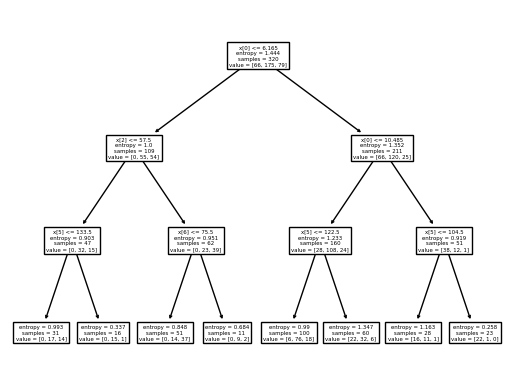

In [20]:
tree.plot_tree(model);

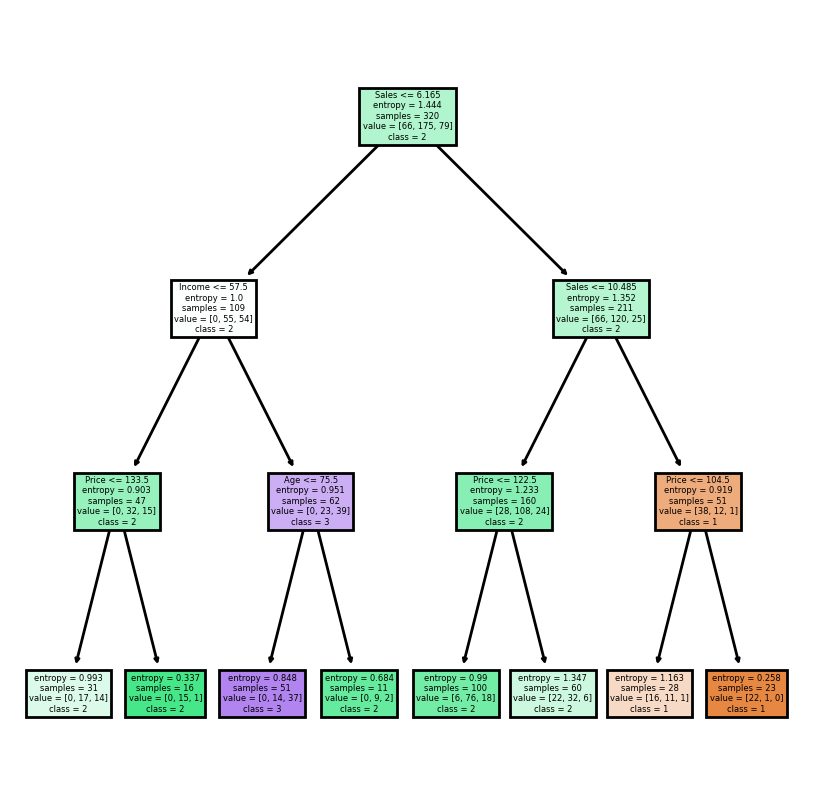

In [21]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price','Age','Education','Urban_Yes','US_Yes']
cn=['1','2','3']
fig,axes =plt.subplots(nrows=1,ncols=1, figsize=(5,5), dpi=200)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [22]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

2    56
3    13
1    11
dtype: int64

In [23]:
preds

array([3, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 1, 2, 3, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 2, 1])

In [24]:
pd.crosstab(y_test,preds)

col_0      1   2  3
ShelveLoc          
1          6  12  1
2          3  36  5
3          2   8  7

In [25]:
#accuracy
np.mean(preds==y_test)

0.6125

#FRAUDCHECK

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier,BaseDecisionTree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score

In [27]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check.csv to Fraud_check (1).csv


In [28]:
Data=pd.read_csv('Fraud_check.csv')
Data

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

In [29]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [30]:
Data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [31]:
Data.corr()

<ipython-input-31-89628327d5af>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Data.corr()


Taxable.Income  City.Population  Work.Experience
Taxable.Income         1.000000        -0.064387        -0.001818
City.Population       -0.064387         1.000000         0.013135
Work.Experience       -0.001818         0.013135         1.000000

converting the tax income to 0 and 1

In [32]:
Data['Taxable.Income']=np.where(Data['Taxable.Income']<=30000,0,1)
Data

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single               1            50047   
1         YES       Divorced               1           134075   
2          NO        Married               1           160205   
3         YES         Single               1           193264   
4          NO        Married               1            27533   
..        ...            ...             ...              ...   
595       YES       Divorced               1            39492   
596       YES       Divorced               1            55369   
597        NO       Divorced               1           154058   
598       YES        Married               1           180083   
599        NO       Divorced               1           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

In [33]:
Data['Taxable.Income'].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

<Axes: xlabel='Taxable.Income', ylabel='count'>

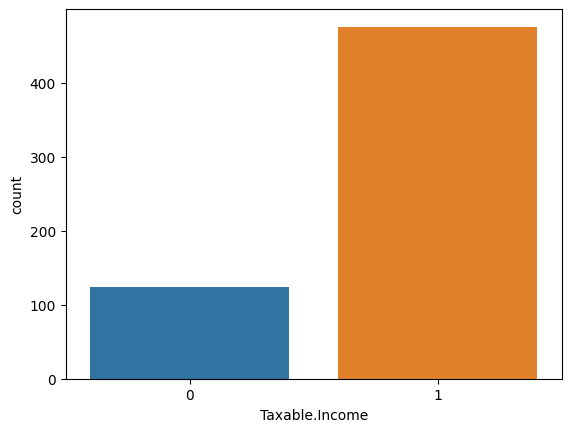

In [34]:
sns.countplot(x=Data['Taxable.Income'])

In [35]:
Data.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single               1            50047               10   
1       YES       Divorced               1           134075               18   
2        NO        Married               1           160205               30   
3       YES         Single               1           193264               15   
4        NO        Married               1            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

In [36]:
Data=pd.get_dummies(Data,columns=['Undergrad','Marital.Status','Urban'])
Data

Taxable.Income  City.Population  Work.Experience  Undergrad_NO  \
0                 1            50047               10             1   
1                 1           134075               18             0   
2                 1           160205               30             1   
3                 1           193264               15             0   
4                 1            27533               28             1   
..              ...              ...              ...           ...   
595               1            39492                7             0   
596               1            55369                2             0   
597               1           154058                0             1   
598               1           180083               17             0   
599               1           158137               16             1   

     Undergrad_YES  Marital.Status_Divorced  Marital.Status_Married  \
0                0                        0                       0   
1                1                        1                       0   
2                0                        0                       1   
3                1                        0                       0   
4                0                        0                       1   
..             ...                      ...                     ...   
595              1                        1                       0   
596              1                        1                       0   
597              0                        1                       0   
598              1                        0                       1   
599              0                        1                       0   

     Marital.Status_Single  Urban_NO  Urban_YES  
0                        1         0          1  
1                        0         0          1  
2                        0         0          1  
3                        1         0          1  
4                        0         1          0  
..                     ...       ...        ...  
595                      0         0          1  
596                      0         0          1  
597                      0         0          1  
598                      0         1          0  
599                      0         1          0  

[600 rows x 10 columns]

In [37]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Taxable.Income           600 non-null    int64
 1   City.Population          600 non-null    int64
 2   Work.Experience          600 non-null    int64
 3   Undergrad_NO             600 non-null    uint8
 4   Undergrad_YES            600 non-null    uint8
 5   Marital.Status_Divorced  600 non-null    uint8
 6   Marital.Status_Married   600 non-null    uint8
 7   Marital.Status_Single    600 non-null    uint8
 8   Urban_NO                 600 non-null    uint8
 9   Urban_YES                600 non-null    uint8
dtypes: int64(3), uint8(7)
memory usage: 18.3 KB


In [38]:
Data.isnull().sum()

Taxable.Income             0
City.Population            0
Work.Experience            0
Undergrad_NO               0
Undergrad_YES              0
Marital.Status_Divorced    0
Marital.Status_Married     0
Marital.Status_Single      0
Urban_NO                   0
Urban_YES                  0
dtype: int64

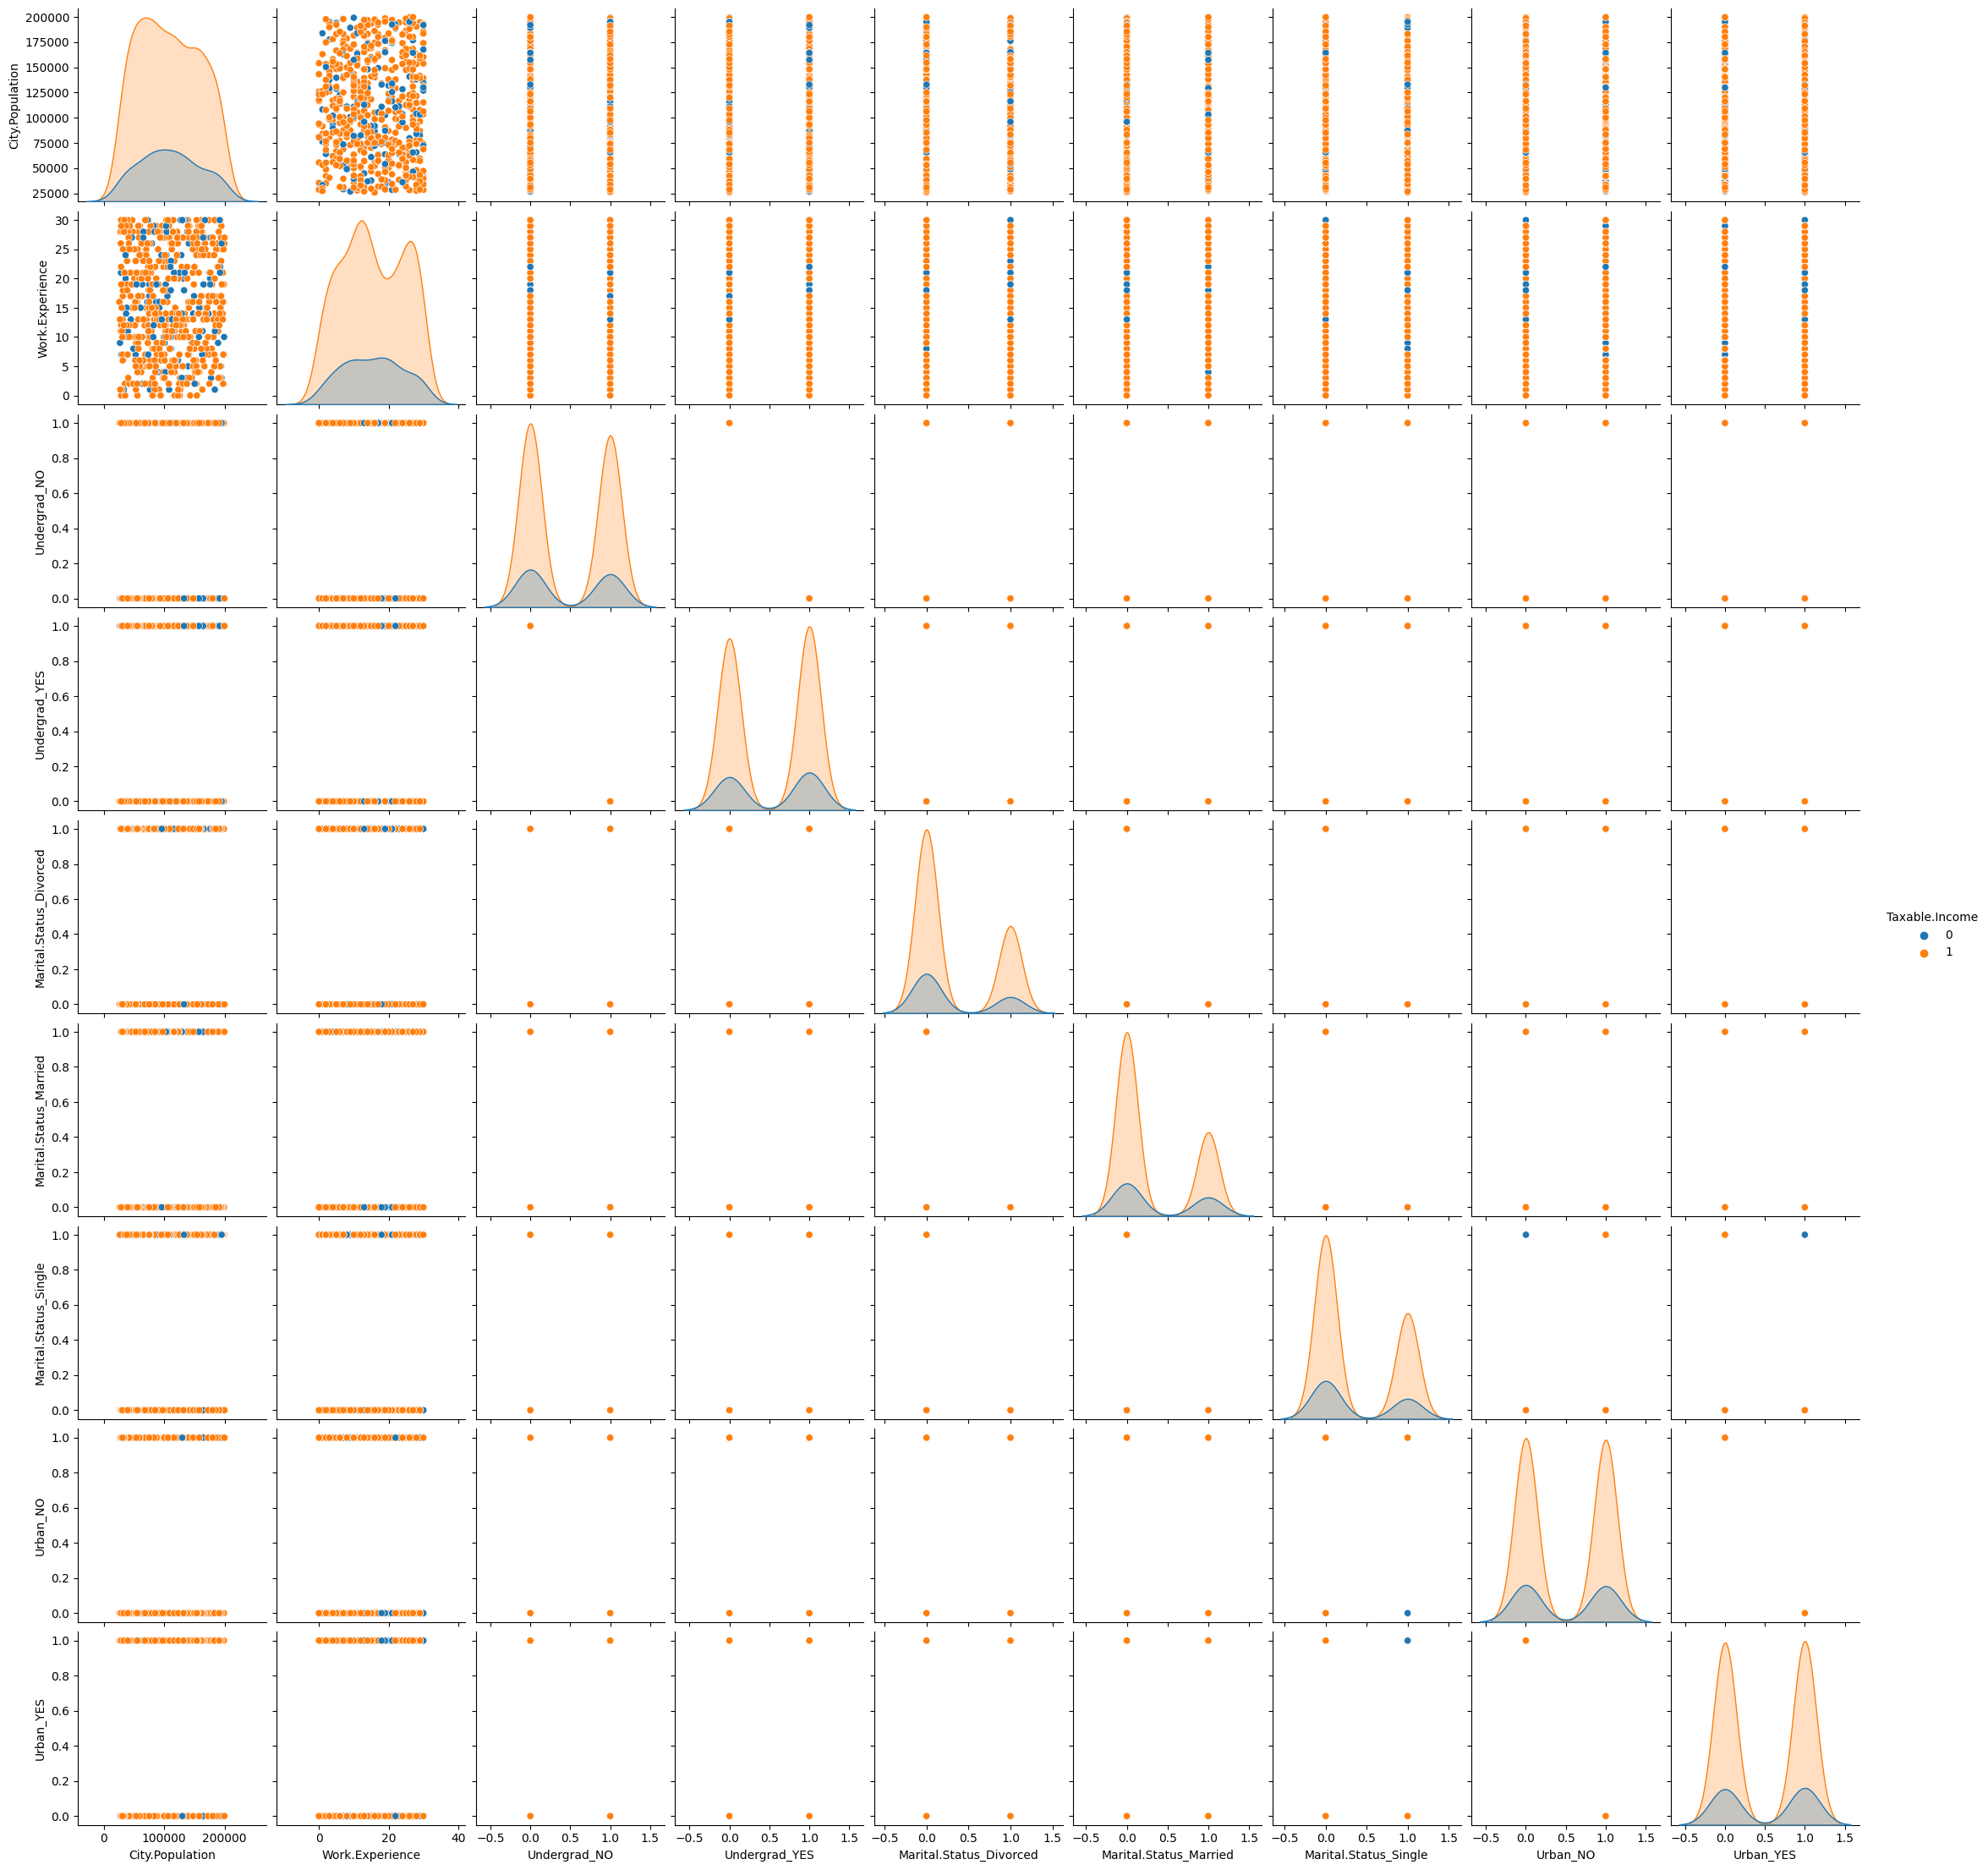

In [39]:
sns.pairplot(Data, hue ='Taxable.Income')

In [40]:
Data.head()

Taxable.Income  City.Population  Work.Experience  Undergrad_NO  \
0               1            50047               10             1   
1               1           134075               18             0   
2               1           160205               30             1   
3               1           193264               15             0   
4               1            27533               28             1   

   Undergrad_YES  Marital.Status_Divorced  Marital.Status_Married  \
0              0                        0                       0   
1              1                        1                       0   
2              0                        0                       1   
3              1                        0                       0   
4              0                        0                       1   

   Marital.Status_Single  Urban_NO  Urban_YES  
0                      1         0          1  
1                      0         0          1  
2                      0         0          1  
3                      1         0          1  
4                      0         1          0

<ipython-input-41-db7494fa68f2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data)


<Axes: ylabel='Density'>

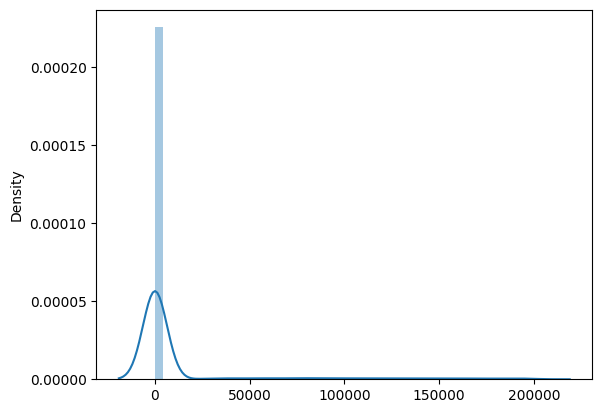

In [41]:
sns.distplot(Data)

<Axes: >

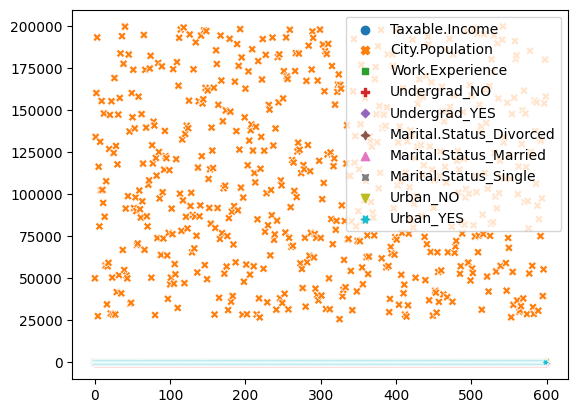

In [42]:
sns.scatterplot(Data)

<Axes: >

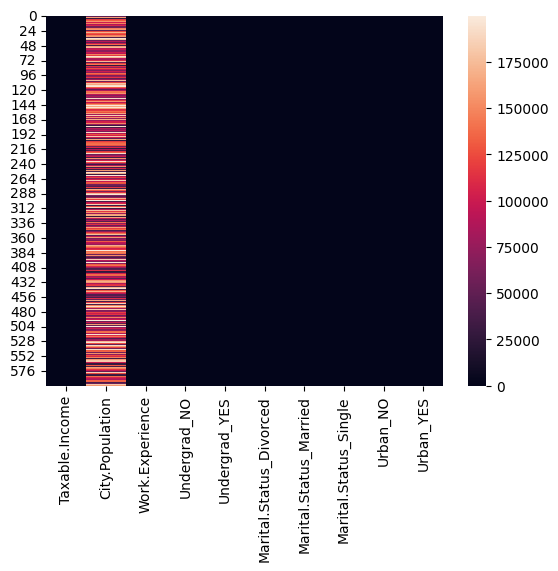

In [43]:
sns.heatmap(Data)

In [44]:
x=Data.iloc[:,1:]
y=Data.iloc[:,0]

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [46]:
x_train

City.Population  Work.Experience  Undergrad_NO  Undergrad_YES  \
20            147222               26             0              1   
157           115631                5             0              1   
371            75580                5             0              1   
58            158047               15             0              1   
391            29934                1             1              0   
..               ...              ...           ...            ...   
365           134321               10             1              0   
428           128266               24             0              1   
499            48744                2             0              1   
374           147614                9             0              1   
67            173986               24             0              1   

     Marital.Status_Divorced  Marital.Status_Married  Marital.Status_Single  \
20                         0                       0                      1   
157                        0                       1                      0   
371                        0                       0                      1   
58                         0                       0                      1   
391                        0                       1                      0   
..                       ...                     ...                    ...   
365                        1                       0                      0   
428                        0                       1                      0   
499                        0                       0                      1   
374                        1                       0                      0   
67                         0                       1                      0   

     Urban_NO  Urban_YES  
20          1          0  
157         1          0  
371         1          0  
58          1          0  
391         1          0  
..        ...        ...  
365         0          1  
428         0          1  
499         0          1  
374         0          1  
67          1          0  

[480 rows x 9 columns]

In [47]:
x_test

City.Population  Work.Experience  Undergrad_NO  Undergrad_YES  \
536           157025               14             1              0   
238            72968                9             0              1   
382           139269               29             0              1   
284           188383               22             1              0   
31            147414               21             1              0   
..               ...              ...           ...            ...   
310           189435               22             0              1   
222           168248               27             0              1   
367            95404               24             0              1   
176            75169               28             1              0   
556            34242               12             1              0   

     Marital.Status_Divorced  Marital.Status_Married  Marital.Status_Single  \
536                        0                       0                      1   
238                        0                       0                      1   
382                        1                       0                      0   
284                        1                       0                      0   
31                         1                       0                      0   
..                       ...                     ...                    ...   
310                        1                       0                      0   
222                        1                       0                      0   
367                        0                       1                      0   
176                        0                       1                      0   
556                        0                       0                      1   

     Urban_NO  Urban_YES  
536         1          0  
238         0          1  
382         1          0  
284         0          1  
31          1          0  
..        ...        ...  
310         0          1  
222         1          0  
367         0          1  
176         1          0  
556         1          0  

[120 rows x 9 columns]

In [48]:
y_train

20     1
157    1
371    1
58     0
391    1
      ..
365    1
428    0
499    1
374    1
67     1
Name: Taxable.Income, Length: 480, dtype: int64

In [49]:
y_test

536    1
238    1
382    1
284    0
31     1
      ..
310    1
222    1
367    0
176    1
556    1
Name: Taxable.Income, Length: 120, dtype: int64

In [50]:
x_train.shape

(480, 9)

In [51]:
x_test.shape

(120, 9)

In [52]:
y_test.shape

(120,)

In [53]:
y_train.shape

(480,)

In [54]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.625, 0.875, 'x[0] <= 195217.5\nentropy = 0.722\nsamples = 480\nvalue = [96, 384]'),
 Text(0.5, 0.625, 'x[5] <= 0.5\nentropy = 0.731\nsamples = 469\nvalue = [96, 373]'),
 Text(0.25, 0.375, 'x[1] <= 23.5\nentropy = 0.68\nsamples = 322\nvalue = [58, 264]'),
 Text(0.125, 0.125, 'entropy = 0.735\nsamples = 242\nvalue = [50, 192]'),
 Text(0.375, 0.125, 'entropy = 0.469\nsamples = 80\nvalue = [8, 72]'),
 Text(0.75, 0.375, 'x[1] <= 29.5\nentropy = 0.824\nsamples = 147\nvalue = [38, 109]'),
 Text(0.625, 0.125, 'entropy = 0.844\nsamples = 140\nvalue = [38, 102]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11]')]

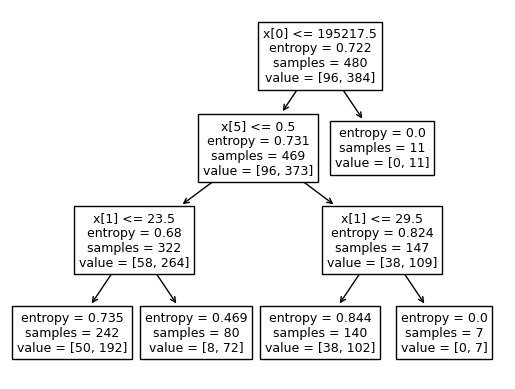

In [55]:
tree.plot_tree(model)

In [56]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [57]:
df=pd.DataFrame({'actual':y_test,'predict':y_pred})
df

actual  predict
536       1        1
238       1        1
382       1        1
284       0        1
31        1        1
..      ...      ...
310       1        1
222       1        1
367       0        1
176       1        1
556       1        1

[120 rows x 2 columns]

In [58]:
accuracy_entropy=accuracy_score(y_test,y_pred)
accuracy_entropy

0.7666666666666667

NORMALISATION

In [59]:
def norm_fun(i):
  x=(i-i.min())/(i.max()-i.min())
  return x

In [60]:
Data=norm_fun(Data)
Data

Taxable.Income  City.Population  Work.Experience  Undergrad_NO  \
0               1.0         0.139472         0.333333           1.0   
1               1.0         0.622394         0.600000           0.0   
2               1.0         0.772568         1.000000           1.0   
3               1.0         0.962563         0.500000           0.0   
4               1.0         0.010081         0.933333           1.0   
..              ...              ...              ...           ...   
595             1.0         0.078811         0.233333           0.0   
596             1.0         0.170058         0.066667           0.0   
597             1.0         0.737240         0.000000           1.0   
598             1.0         0.886810         0.566667           0.0   
599             1.0         0.760683         0.533333           1.0   

     Undergrad_YES  Marital.Status_Divorced  Marital.Status_Married  \
0              0.0                      0.0                     0.0   
1              1.0                      1.0                     0.0   
2              0.0                      0.0                     1.0   
3              1.0                      0.0                     0.0   
4              0.0                      0.0                     1.0   
..             ...                      ...                     ...   
595            1.0                      1.0                     0.0   
596            1.0                      1.0                     0.0   
597            0.0                      1.0                     0.0   
598            1.0                      0.0                     1.0   
599            0.0                      1.0                     0.0   

     Marital.Status_Single  Urban_NO  Urban_YES  
0                      1.0       0.0        1.0  
1                      0.0       0.0        1.0  
2                      0.0       0.0        1.0  
3                      1.0       0.0        1.0  
4                      0.0       1.0        0.0  
..                     ...       ...        ...  
595                    0.0       0.0        1.0  
596                    0.0       0.0        1.0  
597                    0.0       0.0        1.0  
598                    0.0       1.0        0.0  
599                    0.0       1.0        0.0  

[600 rows x 10 columns]

In [61]:
x=Data.iloc[:,1:]
y=Data.iloc[:,0]

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=55)

In [63]:
x_train

City.Population  Work.Experience  Undergrad_NO  Undergrad_YES  \
145         0.986460         0.066667           1.0            0.0   
494         0.984293         0.433333           1.0            0.0   
287         0.294961         0.033333           0.0            1.0   
157         0.516394         0.166667           0.0            1.0   
228         0.430560         0.300000           1.0            0.0   
..               ...              ...           ...            ...   
347         0.317312         0.000000           1.0            0.0   
37          0.236398         0.166667           1.0            0.0   
541         0.954574         1.000000           0.0            1.0   
295         0.082242         0.333333           0.0            1.0   
461         0.793809         0.200000           1.0            0.0   

     Marital.Status_Divorced  Marital.Status_Married  Marital.Status_Single  \
145                      1.0                     0.0                    0.0   
494                      0.0                     0.0                    1.0   
287                      0.0                     0.0                    1.0   
157                      0.0                     1.0                    0.0   
228                      0.0                     1.0                    0.0   
..                       ...                     ...                    ...   
347                      0.0                     1.0                    0.0   
37                       0.0                     1.0                    0.0   
541                      1.0                     0.0                    0.0   
295                      0.0                     1.0                    0.0   
461                      0.0                     0.0                    1.0   

     Urban_NO  Urban_YES  
145       0.0        1.0  
494       0.0        1.0  
287       0.0        1.0  
157       1.0        0.0  
228       0.0        1.0  
..        ...        ...  
347       0.0        1.0  
37        0.0        1.0  
541       0.0        1.0  
295       1.0        0.0  
461       0.0        1.0  

[420 rows x 9 columns]

In [64]:
x_test

City.Population  Work.Experience  Undergrad_NO  Undergrad_YES  \
554         0.701205         0.900000           1.0            0.0   
192         0.579181         0.333333           0.0            1.0   
68          0.654389         0.166667           1.0            0.0   
439         0.133202         0.266667           0.0            1.0   
592         0.283703         0.533333           0.0            1.0   
..               ...              ...           ...            ...   
86          0.412307         0.966667           0.0            1.0   
382         0.652245         0.966667           0.0            1.0   
45          0.904120         0.466667           0.0            1.0   
508         0.974592         0.633333           1.0            0.0   
574         0.017178         0.966667           0.0            1.0   

     Marital.Status_Divorced  Marital.Status_Married  Marital.Status_Single  \
554                      1.0                     0.0                    0.0   
192                      0.0                     1.0                    0.0   
68                       0.0                     0.0                    1.0   
439                      1.0                     0.0                    0.0   
592                      0.0                     0.0                    1.0   
..                       ...                     ...                    ...   
86                       1.0                     0.0                    0.0   
382                      1.0                     0.0                    0.0   
45                       0.0                     1.0                    0.0   
508                      0.0                     0.0                    1.0   
574                      1.0                     0.0                    0.0   

     Urban_NO  Urban_YES  
554       1.0        0.0  
192       0.0        1.0  
68        1.0        0.0  
439       1.0        0.0  
592       1.0        0.0  
..        ...        ...  
86        0.0        1.0  
382       1.0        0.0  
45        0.0        1.0  
508       1.0        0.0  
574       0.0        1.0  

[180 rows x 9 columns]

In [65]:
y_train

145    1.0
494    1.0
287    1.0
157    1.0
228    0.0
      ... 
347    0.0
37     1.0
541    0.0
295    1.0
461    1.0
Name: Taxable.Income, Length: 420, dtype: float64

In [66]:
y_test

554    1.0
192    1.0
68     0.0
439    0.0
592    1.0
      ... 
86     1.0
382    1.0
45     1.0
508    1.0
574    1.0
Name: Taxable.Income, Length: 180, dtype: float64

In [67]:
x_train.shape

(420, 9)

In [68]:
x_test.shape

(180, 9)

In [69]:
y_train.shape

(420,)

In [70]:
y_test.shape

(180,)

In [71]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

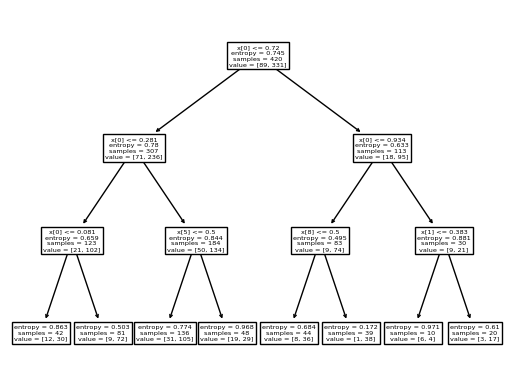

In [72]:
tree=plot_tree(model)

In [73]:
y_pred=model.predict(x_test)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [74]:
data_1=pd.DataFrame({'actual':y_test,'predicts':y_pred})
data_1

actual  predicts
554     1.0       1.0
192     1.0       1.0
68      0.0       1.0
439     0.0       1.0
592     1.0       1.0
..      ...       ...
86      1.0       1.0
382     1.0       1.0
45      1.0       1.0
508     1.0       1.0
574     1.0       1.0

[180 rows x 2 columns]

In [75]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        35
         1.0       0.80      0.98      0.88       145

    accuracy                           0.79       180
   macro avg       0.40      0.49      0.44       180
weighted avg       0.65      0.79      0.71       180



In [76]:
#Accuracy
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7888888888888889